## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced / part time / full time: PART TIME
* Scheduled project review date/time:  24 JAN 2023
* Instructor name: ABHINEET KULKARNI
* Blog post URL: https://www.blogger.com/blog/post/edit/4076241086869822975/641408001827348784?hl=en

## Image classification using CNN for Diabetic Retinopathy
Imagine this we are a start up. Seeking to develop a deep learning model That can detect and classify different types of diabetic retinopathy.

### What is Diabetic Retinopathy?
People with diabetes can have an eye disease called diabetic retinopathy. This is when high blood sugar levels cause damage to blood vessels in the retina. These blood vessels can swell and leak. Or they can close, stopping blood from passing through. Sometimes abnormal, new blood vessels grow on the retina. All of these changes can steal your vision.

#### The 4 classifications of Diabetic Retinopathy
The purpose here is to build a model that can distinguish between the various levels of diabetic retinopathy.

#### The Levels of Diabetic Retinopathy
This dataset analyzes the various levels of diabetic retinopathy and are classified as such:

***Stage 0*** - Healthy eyes

***Stage 1*** - Mild nonproliferative diabetic retinopathy.

***Stage 2*** - Moderate nonproliferative diabetic retinopathy

***Stage 3*** - Severe nonproliferative diabetic retinopathy.

***Stage 4*** - Proliferative diabetic retinopathy.

![DR](https://www.ophthalytics.com/wp-content/uploads/2021/08/Copy-of-WEBSITE-CONTENT-768x439.png)

In [40]:
#Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import glob
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

### Loading Dataset
Since our dataset is seperated by training, validation and testing.

***Training data*** builds the machine learning model. It teaches what the expected output looks like.

***Validation data*** provides an unbiased evaluation of a model fit on the training data set

***Test data*** is a dataset used to provide an unbiased evaluation of a final model fit on the training data set.

In [41]:
#Setting up Directory's

#Train images Directory
train_dir = 'input/diabetic-retinopathy-balanced/train/'
#Test Images Directory
test_dir = 'input/diabetic-retinopathy-balanced/test/'
#Validation Images Directory
val_dir = 'input/diabetic-retinopathy-balanced/val/'

### Visualization of dataset

First we define a function called load_dataset, the purpose here is to help us then create a sample DataFrame which will then be used to load a sample image.

Next, I also use a data visualization tool called seaborn, to look at the distribution of the dataset. Ensure data is equally distributed. If not, additionally preprocessing will need to be done before getting started

In [42]:
#defining function to load datasets for visualization purposes
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [43]:
#Creating Sample Training dataFrame for image visualization
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
train.head()

4 - PDR Completed
2 - Moderate NPDR Completed
3 - Severe NPDR Completed
0 - Healthy Eyes Completed
1 - Mild NPDR Completed


,image,label
0,input/diabetic-retinopathy-balanced/train/4 - ...,4 - PDR
1,input/diabetic-retinopathy-balanced/train/4 - ...,4 - PDR
2,input/diabetic-retinopathy-balanced/train/4 - ...,4 - PDR
3,input/diabetic-retinopathy-balanced/train/4 - ...,4 - PDR
4,input/diabetic-retinopathy-balanced/train/4 - ...,4 - PDR


<AxesSubplot:xlabel='label', ylabel='count'>

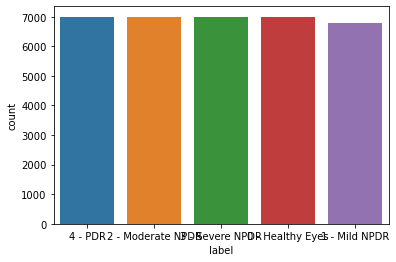

In [44]:
#Performing data visualization on image distribution. 
sns.countplot(train['label'])

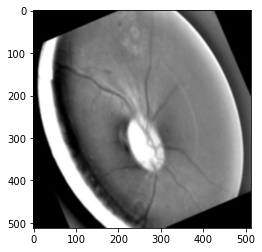

In [45]:
#Loading sample image from training dataset
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img)

### Creating dataset
First we will set our parameters which are to be used when creating the dataset.

Using ***tf.keras.utils.image_dataset_from_directory***, this will pull images from the set directory to make a dataset. Using this method, we will create the test, train, and validation datasets.

Also the first 9 images of the dataset are pulled for display.

In [46]:
#setting parameters
batch_size = 32
img_height = 180
img_width = 180

image_size = img_height, img_width

In [47]:
#Images Directory
train_dir = 'input/diabetic-retinopathy-balanced/train/'
test_dir = 'input/diabetic-retinopathy-balanced/test/'
val_dir = 'input/diabetic-retinopathy-balanced/val/'

In [48]:
#Creating Training Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=777,
    image_size = (img_height, img_width),
    batch_size = (batch_size))

Found 34792 files belonging to 5 classes.


In [49]:
#Creating Validation Dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed = 777,
    image_size = (img_height, img_width),
    batch_size= (batch_size))

Found 9940 files belonging to 5 classes.


### Creating Test set for Model Evaluation

For the test dataset, we will load the data manually. Then the data is converted into a numpy array. Where it is then normalization of the dataset is done by dividing by 255.0. Using the ImageDataGenerator we will use to load and create our classes. Lastly set the classes.

In [50]:
#Loading Test dataset as x_test
x_test=[]
for folder in os.listdir(test_dir):
    sub_path=test_dir+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(180,180))
        x_test.append(img_arr)

In [51]:
#Converting into numpy array
test_x=np.array(x_test)

#Normalization of dataset
test_x = test_x/255.0

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Instantiating the ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)

#Using ImageDataGenerator To create and load classes
test_set = datagen.flow_from_directory(test_dir,
                                            target_size = (180,180),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 4971 images belonging to 5 classes.


In [53]:
test_set.class_indices

{'0 - Healthy Eyes': 0,
 '1 - Mild NPDR': 1,
 '2 - Moderate NPDR': 2,
 '3 - Severe NPDR': 3,
 '4 - PDR': 4}

In [54]:
#Setting the classes
test_y=test_set.classes

In [55]:
test_y.shape

(4971,)

### Displaying Fist 9 images from training set

['0 - Healthy Eyes', '1 - Mild NPDR', '2 - Moderate NPDR', '3 - Severe NPDR', '4 - PDR']


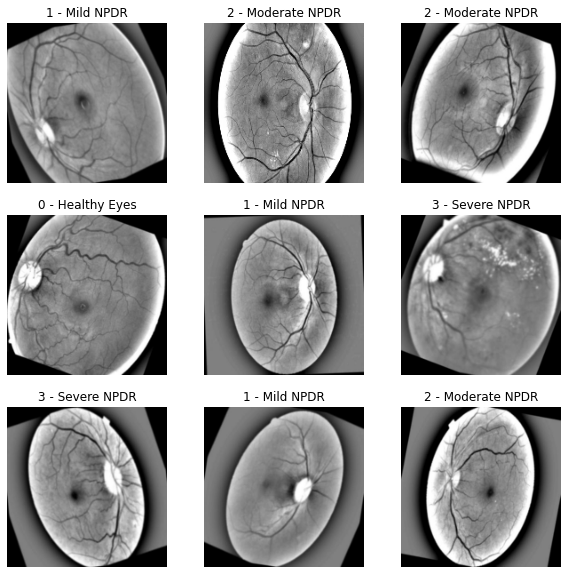

In [56]:
#First 9 images from training set

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Configuring the dataset for performance
Using **Dataset.prefetch** overlaps data preprocessing and model execution while training.

The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. 

To avoid doing so, I set it to **tf.data.AUTOTUNE***, which will prompt the dataset runtime to tune the value dynamically at runtime.

In [57]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size = AUTOTUNE)

### Building the Model

I will be using a **Sequential Model** here first, to build the **Convolutional Neural Network** or **CNN** model which will be used.

Then the following layers are added

1) **Conv2D** (e.g. spatial convolution over images). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

2) **MaxPooling2D** This passes a moving window over the image and downscales the image by outputting the maximum value within the window

3) **Dropout** Used to prevent overfitting of data

4) **Flatten** flattens the output from the convolutional part of the CNN into a one-dimensional feature vector which can be passed into the following fully connected layers.

5) **Dense** Fully connected layer where every input is connected to every output

In [58]:
#Instantiating our model with rescaling
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

num_classes = len(class_names)

#Adding Layers
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(164, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

#fully connected layer

model.add(Dense(128, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(256, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(256, kernel_initializer = 'uniform', activation='relu'))
#prediction layer
model.add(Dense(num_classes, activation='softmax', name = 'preds'))


In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Compiling & Fitting the model 
When compiling the model, we introduce a learning rate of 0.001, to increase accuracy when training the model.

The **Adam** will be used as an Optimizer.

The Loss will **tf.keras.losses.SparseCategoricalCrossentropy** which Computes the crossentropy loss between the labels and predictions, we also use it with from_**logits=True** since the model provides a linear output.

When fitting the model, I use 10 epochs.

Validation dataset is included as a parameter under validation_data.

In [60]:
#setting parameters for base rate
base_learning_rate = 0.001

#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
#Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [62]:
#Number of Epochs used in training
epochs = 10
#min_steps = len(train_ds)//batch_size

#Fitting the data and running our model
main_history = model.fit(train_ds, 
                    validation_data=val_ds,
                    #steps_per_epoch = min_steps,
                    epochs= epochs)

Epoch 1/10
1088/1088 [==============================] - 868s 797ms/step - loss: 1.3188 - accuracy: 0.3871 - val_loss: 1.2517 - val_accuracy: 0.4384
Epoch 2/10
1088/1088 [==============================] - 769s 707ms/step - loss: 1.2456 - accuracy: 0.4334 - val_loss: 1.2111 - val_accuracy: 0.4525
Epoch 3/10
1088/1088 [==============================] - 754s 693ms/step - loss: 1.2049 - accuracy: 0.4564 - val_loss: 1.2410 - val_accuracy: 0.4565
Epoch 4/10
1088/1088 [==============================] - 765s 703ms/step - loss: 1.1601 - accuracy: 0.4807 - val_loss: 1.1938 - val_accuracy: 0.4632
Epoch 5/10
1088/1088 [==============================] - 771s 709ms/step - loss: 1.0968 - accuracy: 0.5122 - val_loss: 1.2681 - val_accuracy: 0.4676
Epoch 6/10
1088/1088 [==============================] - 808s 743ms/step - loss: 1.0143 - accuracy: 0.5554 - val_loss: 1.3289 - val_accuracy: 0.4527
Epoch 7/10
1088/1088 [==============================] - 807s 742ms/step - loss: 0.9155 - accuracy: 0.6035 - val_

### Visualization of Model Performance

In [63]:
acc = main_history.history['accuracy']
val_acc = main_history.history['val_accuracy']
loss = main_history.history['loss']
val_loss = main_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

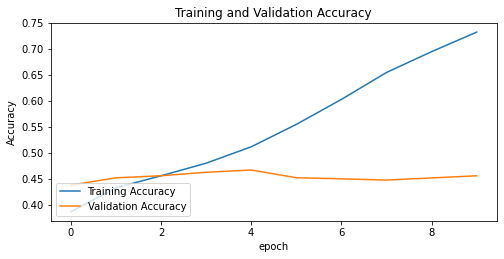

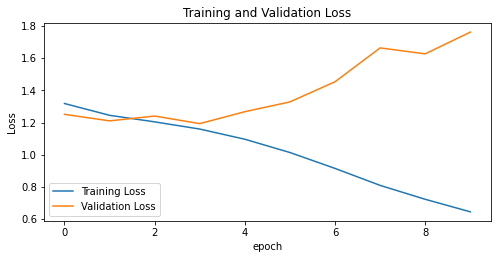

In [64]:
#Visualization for Training and Validation Accuracy
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower left")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title("Training and Validation Accuracy")

#Data Visualization for Training and Validation Loss
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = "Validation Loss")
plt.legend(loc = "lower left")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Training and Validation Loss")

In [65]:
#Model Evaluation

# evaluate model on test set
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# evaluate model on training set
eval_score = model.evaluate(train_ds)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

156/156 [==============================] - 30s 192ms/step - loss: 4.2248 - accuracy: 0.2012
Test loss: 4.2248454093933105
Test accuracy: 0.2011667639017105
1088/1088 [==============================] - 232s 212ms/step - loss: 0.7329 - accuracy: 0.7084
Eval loss: 0.7329288125038147
Eval accuracy: 0.7084099650382996


In [66]:
#Predictions on test set
raw_score_predictions = model.predict(test_x)
predictions = np.argmax(raw_score_predictions, axis =-1)

156/156 [==============================] - 30s 191ms/step


In [68]:
print(classification_report(test_y, predictions ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00       971
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.20      1.00      0.33      1000

    accuracy                           0.20      4971
   macro avg       0.04      0.20      0.07      4971
weighted avg       0.04      0.20      0.07      4971



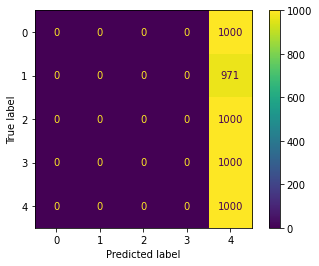

In [69]:
#Creating Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_y, predictions)

###  How to Interpretation of Classification Report
1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

    F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

4. Accuracy: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.


### Interpretation of Clasification Report and Confusion. Matrix
#### Confusion. Matrix
For Confusion, it is obvious. The model can not distinguish between the different classes, hence it is reporting all data as under one class.

#### Classification report
***Major Takeawy*** - Model not distinguish different classes, results from other classes not reported

***In depth analysis***
For Class 4 (Severe Proliferative Diabetic Retinopathy) 

Precision - 20% Correct positive predictions,  (1 out of 5 classes).
    
Recall - 100 % of all Class 4 Diabetic Retinopathy classified.
    
 F1 - Score  - The Harmonic mean of precision and recall is is 33%
    
 Accuracy 20%

### Transfer Learning 

#### Creating base model from the pre-trained model

With Regards to transfer learning I will be using the MobileNet model developed at Google. This model is pre-trained on the 'ImageNet' dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories. This base of knowledge will help us classify the different levels of diabetic retinopathy from our specific dataset.

First, instantiate a MobileNet model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [70]:
#Creating the base model from the pre-trained model MobileNet
from keras.applications import MobileNet

cnn_base = MobileNet(weights ='imagenet', include_top = False,input_shape =(img_height, img_width, 3) )

In [71]:
#Taking a look at the base model architecture
cnn_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 90, 90, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 90, 90, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 90, 90, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 90, 90, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 90, 90, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 11, 11, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 11, 11, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 11, 11, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 11, 11, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 11, 11, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 11, 11, 512)       262144    
                                                                 
 conv_pw_9

### Building the model Using Transfer Learning

Using the **Sequential Model** here first. This time we will apply the pre-built **MobileNet** CNN Parameters to our model.

The following layers are added:

1) **cnn_base** This is the pre-built MobileNet CNN Model

2) **MaxPooling2D** This passes a moving window over the image and downscales the image by outputting the maximum value within the window

3) **Dropout** Used to prevent overfitting of data

4) **Flatten** flattens the output from the convolutional part of the CNN into a one-dimensional feature vector which can be passed into the following fully connected layers.

5) **Dense** Fully connected layer where every input is connected to every output

In [72]:
#Generating model layers
from keras import models
from keras import layers
from keras import optimizers

num_classes = len(class_names)

model2 = models.Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))])
model2.add(cnn_base)
#ADDING LAYERS
model2.add(Dropout(0.2))
model2.add(layers.MaxPooling2D())
model2.add(layers.Flatten())

#fully connected Dense Layers
model2.add(Dense(64, kernel_initializer = 'he_uniform', activation = 'relu'))
model2.add(Dense(128, kernel_initializer = 'he_uniform', activation = 'relu'))
model2.add(Dense(256, kernel_initializer = 'he_uniform', activation = 'relu'))

#prediction layer
model2.add(Dense(num_classes, activation ='softmax', name = 'preds'))

### Feature extraction
In this step, we will freeze the convolutional base created from the previous step and to use as a feature extractor. 

#### Freezing the convolutional base
It is important to freeze the convolutional base before we compile and train the model. Freezing (by setting **layer.trainable = False**) prevents the weights in a given layer from being updated during training. MobileNet has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [73]:
#Checking whether layer is trainable
for layer in model2.layers:
    print(layer.name, layer.trainable) 

rescaling_6 True
mobilenet_1.00_224 True
dropout_9 True
max_pooling2d_13 True
flatten_5 True
dense_17 True
dense_18 True
dense_19 True
preds True


In [74]:
#freezing cnn_base layer
cnn_base.trainable = False

#Verification cnn_base model is frozen
for layer in model2.layers:
    print(layer.name, layer.trainable) 

rescaling_6 True
mobilenet_1.00_224 False
dropout_9 True
max_pooling2d_13 True
flatten_5 True
dense_17 True
dense_18 True
dense_19 True
preds True


In [75]:
#model summary
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 1024)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 1024)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_17 (Dense)            (None, 64)               

### Compiling & Fitting the model 
Just as before we will use the **Adam** Optimizer, and **SparseCategoricalCrossentropy** loss just as before, as well as the same learning rate.

Validation dataset is included as a parameter under validation_data.

In [76]:
#compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
history = model2.fit(train_ds, 
                    validation_data=val_ds,
                    epochs = epochs)

Epoch 1/10
1088/1088 [==============================] - 780s 716ms/step - loss: 1.2647 - accuracy: 0.4548 - val_loss: 1.1539 - val_accuracy: 0.5059
Epoch 2/10
1088/1088 [==============================] - 749s 688ms/step - loss: 1.1260 - accuracy: 0.5082 - val_loss: 1.0925 - val_accuracy: 0.5348
Epoch 3/10
1088/1088 [==============================] - 736s 676ms/step - loss: 1.0670 - accuracy: 0.5457 - val_loss: 1.0364 - val_accuracy: 0.5599
Epoch 4/10
1088/1088 [==============================] - 742s 682ms/step - loss: 1.0294 - accuracy: 0.5638 - val_loss: 1.0564 - val_accuracy: 0.5460
Epoch 5/10
1088/1088 [==============================] - 742s 682ms/step - loss: 1.0049 - accuracy: 0.5747 - val_loss: 1.0254 - val_accuracy: 0.5670
Epoch 6/10
1088/1088 [==============================] - 728s 669ms/step - loss: 0.9828 - accuracy: 0.5873 - val_loss: 1.0250 - val_accuracy: 0.5659
Epoch 7/10
1088/1088 [==============================] - 722s 663ms/step - loss: 0.9713 - accuracy: 0.5902 - val_

### Learning curves
Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet base model as a fixed feature extractor.

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

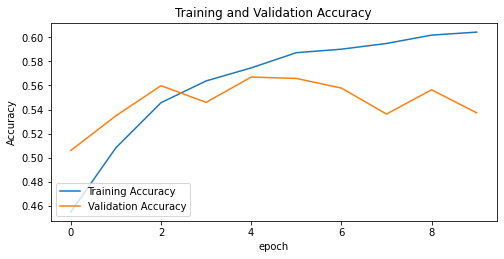

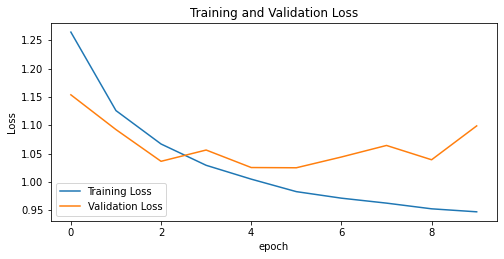

In [79]:
#Visualization for Training and Validation Accuracy after transfer learning
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower left")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title("Training and Validation Accuracy")

#Data Visualization for Training and Validation Loss after Transfer learning
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = "Validation Loss")
plt.legend(loc = "lower left")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Training and Validation Loss")

In [80]:
#Model Evaluation

# evaluate model on test set
score = model2.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# evaluate model on holdout set
eval_score = model2.evaluate(train_ds)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

156/156 [==============================] - 84s 537ms/step - loss: 2.0267 - accuracy: 0.2012
Test loss: 2.0267386436462402
Test accuracy: 0.2011667639017105
1088/1088 [==============================] - 587s 539ms/step - loss: 0.9663 - accuracy: 0.5959
Eval loss: 0.9663158655166626
Eval accuracy: 0.5959416031837463


In [81]:
#Predictions on test set
raw_score_predictions = model2.predict(test_x)
predictions = np.argmax(raw_score_predictions, axis =-1)

156/156 [==============================] - 86s 540ms/step


In [95]:
#Running Classification report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00       971
           2       0.20      1.00      0.33      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000

    accuracy                           0.20      4971
   macro avg       0.04      0.20      0.07      4971
weighted avg       0.04      0.20      0.07      4971



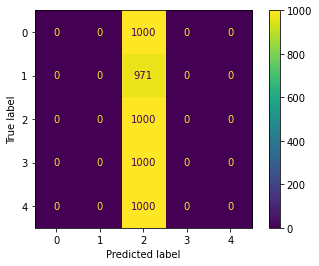

In [83]:
#Creating Confusion_Matrix
ConfusionMatrixDisplay.from_predictions(test_y, predictions)

### Interpretation of Clasification Report and Confusion. Matrix
#### Confusion. Matrix
For Confusion, it is obvious. The model can not distinguish between the different classes, hence it is reporting all data as under one class.

#### Classification report
***Major Takeaway*** - Model not distinguish different classes, results from other classes not reported.

***In depth analysis***
For Class 2 (Moderate Non-Proliferative Diabetic Retinopathy) 

Precision - 20% Correct positive predictions,  (1 out of 5 classes).
    
Recall - 100 % of all Class 4 Diabetic Retinopathy classified.
    
F1 - Score  - The Harmonic mean of precision and recall is is 33%
    
Accuracy 20% score

### Summary of Results / Conclusion
Unfortunately it appears the model can not distinguish between the different classes. Despite multiple changes to architecture and the use of transfer learning. 

After transfer learning, the model greatly increase in accuracies. Overfitting is also significantly smaller. Overall model performance is much better. More Data is still needed to evaluate the model further.


Unfortunately the data requires additional image processing as well as additional images (clearer images, images from different angles) and feature engineering for better results.

Results limited to computational resources available

Model could not distinguish between different classes.

### Next steps...
Build deep learning models to other ocular diseases to see how well models evaluate and perform (e.g., Diabetic Macular Edema).

Pursue other areas of medicine, where we can track disease progression such as cancer metastasis.

Using Deep Learning for disease detection such as pneumonia detection in lungs.

###  Appendix 1 : Fine Tuning
#### Un-freezing the top layers of the model

Fine Tuning consists of unfreezing the part of the model, and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.

In [84]:
#Unfreezing the base model
cnn_base.trainable = True

In [85]:
#Counting number of layers are in the base model
print("number of layers in the base model:", len(cnn_base.layers))

#Fine tuning from this layer forwards
fine_tune_at = len(cnn_base.layers)

#Freezing the layers before the 'fine_tune_at' layer
for layer in cnn_base.layers[:fine_tune_at]:
    layer.trainable = False

number of layers in the base model: 86


In [86]:
#Model Summary
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 1024)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 1024)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_17 (Dense)            (None, 64)               

### Compiling & Fitting the model 
Just as before we will use the **Adam** Optimizer, and **SparseCategoricalCrossentropy** loss just as before.

Only change here is we are continuing our training from where our model last stopped. and adding an additional 15 extra epochs to this mode..

Validation dataset is included as a parameter under validation_data.

In [87]:
#compiling the model

model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
#Running The Model

new_epochs = epochs + epochs 

historyfined = model2.fit(train_ds,
                        epochs = new_epochs,
                        initial_epoch = history.epoch[-1],
                        validation_data=val_ds)

Epoch 10/20
1088/1088 [==============================] - 739s 678ms/step - loss: 0.9424 - accuracy: 0.6066 - val_loss: 1.0307 - val_accuracy: 0.5596
Epoch 11/20
1088/1088 [==============================] - 702s 645ms/step - loss: 0.9323 - accuracy: 0.6108 - val_loss: 1.0304 - val_accuracy: 0.5618
Epoch 12/20
1088/1088 [==============================] - 705s 648ms/step - loss: 0.9284 - accuracy: 0.6120 - val_loss: 1.0193 - val_accuracy: 0.5655
Epoch 13/20
1088/1088 [==============================] - 703s 646ms/step - loss: 0.9273 - accuracy: 0.6103 - val_loss: 1.0390 - val_accuracy: 0.5614
Epoch 14/20
1088/1088 [==============================] - 725s 666ms/step - loss: 0.9227 - accuracy: 0.6132 - val_loss: 1.0235 - val_accuracy: 0.5635
Epoch 15/20
1088/1088 [==============================] - 759s 698ms/step - loss: 0.9192 - accuracy: 0.6146 - val_loss: 1.0271 - val_accuracy: 0.5634
Epoch 16/20
1088/1088 [==============================] - 716s 658ms/step - loss: 0.9161 - accuracy: 0.6156

#### Learning curves
Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet base model after fine tuning.

In [89]:
acc = historyfined.history['accuracy']
val_acc = historyfined.history['val_accuracy']
loss = historyfined.history['loss']
val_loss = historyfined.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

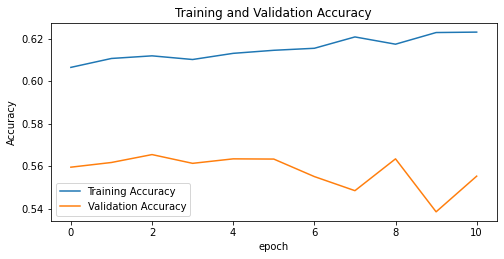

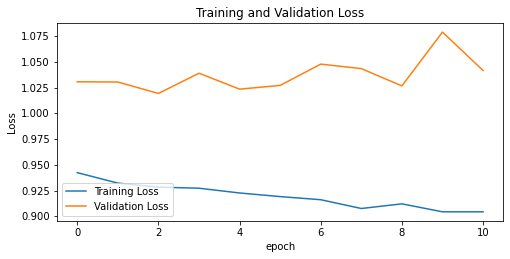

In [90]:
#Visualization for Training and Validation Accuracy after Fine Tuning
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower left")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title("Training and Validation Accuracy")

#Data Visualization for Training and Validation Loss after Fine Tuning
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = "Validation Loss")
plt.legend(loc = "lower left")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Training and Validation Loss")

In [91]:
#Model Evaluation

# evaluate model on test set
score = model2.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# evaluate model on train set
eval_score = model2.evaluate(train_ds)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

156/156 [==============================] - 83s 528ms/step - loss: 1.9736 - accuracy: 0.2012
Test loss: 1.973573923110962
Test accuracy: 0.2011667639017105
1088/1088 [==============================] - 582s 535ms/step - loss: 0.8711 - accuracy: 0.6444
Eval loss: 0.8710633516311646
Eval accuracy: 0.6444297432899475


In [92]:
#Predictions on test set
raw_score_predictions = model2.predict(test_x)
predictions = np.argmax(raw_score_predictions, axis =-1)

156/156 [==============================] - 88s 554ms/step


In [93]:
#Running Classification report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00       971
           2       0.20      1.00      0.33      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000

    accuracy                           0.20      4971
   macro avg       0.04      0.20      0.07      4971
weighted avg       0.04      0.20      0.07      4971



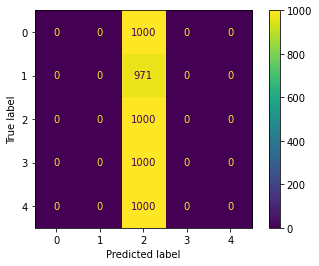

In [94]:
#Creating Confusion_Matrix
ConfusionMatrixDisplay.from_predictions(test_y, predictions)

### Interpretation of Clasification Report and Confusion. Matrix
#### Confusion. Matrix
For Confusion, it is obvious. The model can not distinguish between the different classes, hence it is reporting all data as under one class.

#### Classification report
***Major Takeaway*** - Model not distinguish different classes, results from other classes not reported.

***In depth analysis***
For Class 2 (Moderate Non-Proliferative Diabetic Retinopathy) 

Precision - 20% Correct positive predictions,  (1 out of 5 classes).
    
Recall - 100 % of all Class 4 Diabetic Retinopathy classified.
    
F1 - Score  - The Harmonic mean of precision and recall is is 33%
    
Accuracy 20% score

### Interpretation of our models

The Original model features over fitting, at roughly 7-8 eppochs.

After transfer learning over fitting is significantly less at 5-6 epochs

After fine tuning, we see constant loss and constant accuracy. This overfitting as well. 

Despite overfitting, we do see final accuracy score of 67%, and validation accuracy of 59%, which means roughly with new data we can expect 59% accuracy. 



### In Closing...
With all 3 models we do see overfitting. Yet, with fine tuning, overfitting is the worst and with Transfer learning, model fitting starts the earliest but is significantly less compared to fine tuning and the original model built.